# Movie Analysis

## Import

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

## Having Data

In [2]:
!ls

2048           Documents      Movies         OneDrive       Untitled.ipynb
Applications   Downloads      Music          Pictures       anaconda3
Desktop        Library        Namsoo.ipynb   Public


In [3]:
cd Documents/Flatiron/Phase_2/

/Users/Namsoo/Documents/Flatiron/Phase_2


In [4]:
!ls


Phase2Challenge            dsc-sql-lab
dsc-hypothesis-testing-lab power_analysis_study.ipynb
dsc-phase-2-project-v3


In [5]:
cd dsc-phase-2-project-v3/

/Users/Namsoo/Documents/Flatiron/Phase_2/dsc-phase-2-project-v3


In [6]:
!ls


CONTRIBUTING.md     README.md           student.ipynb
LICENSE.md          movie_data_erd.jpeg zippedData


In [7]:
cd zippedData/


/Users/Namsoo/Documents/Flatiron/Phase_2/dsc-phase-2-project-v3/zippedData


In [8]:
!ls

bom.movie_gross.csv.gz  rt.movie_info.tsv.gz    tn.movie_budgets.csv.gz
im.db                   rt.reviews.tsv.gz
im.db.zip               tmdb.movies.csv.gz


In [9]:
import pandas as pd

In [10]:
import sqlite3

In [11]:
bom_movie_gross = pd.read_csv('bom.movie_gross.csv.gz')


In [12]:
rt_movie_info = pd.read_csv('rt.movie_info.tsv.gz', sep = '\t')


In [13]:
tn_movie_budgets = pd.read_csv('tn.movie_budgets.csv.gz')


In [14]:
rt_reviews = pd.read_csv('rt.reviews.tsv.gz', sep = '\t', encoding = 'latin-1')


In [15]:
tmdb_movies = pd.read_csv('tmdb.movies.csv.gz')


## Import a CSV file in to a sql table

## Checking CSV or TSV files (head and info)

In [16]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [17]:
rt_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [18]:
rt_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [19]:
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [20]:
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [21]:
rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [22]:
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [23]:
rt_reviews['id'].value_counts()

id
782     338
1067    275
1525    262
1777    260
1083    260
       ... 
1393      1
411       1
770       1
1125      1
1526      1
Name: count, Length: 1135, dtype: int64

In [24]:
tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [25]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [66]:
tn_movie_budgets['movie'].value_counts()

movie
Halloween                              3
Home                                   3
King Kong                              3
Friday the 13th                        2
The Last House on the Left             2
                                      ..
9                                      1
What's the Worst That Could Happen?    1
Entourage                              1
Love and Other Drugs                   1
My Date With Drew                      1
Name: count, Length: 5698, dtype: int64

In [67]:
tn_movie_budgets['movie'].describe()

count          5782
unique         5698
top       Halloween
freq              3
Name: movie, dtype: object

In [69]:
tn_movie_budgets.loc[tn_movie_budgets['movie'] == 'Halloween',['movie', 'release_date']]

,movie,release_date
3014,Halloween,"Aug 31, 2007"
3535,Halloween,"Oct 19, 2018"
5536,Halloween,"Oct 17, 1978"


## Checking imdb(head and info)

In [26]:
path = 'im.db'
conn = sqlite3.connect(path)

In [27]:
df_person = pd.read_sql(
    """
    SELECT *
    FROM persons
    """
, conn
)


In [28]:
df_person.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB


In [29]:
df_person.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [30]:
df_person['death_year'].value_counts().head()

death_year
2018.0    624
2017.0    621
2016.0    592
2015.0    540
2013.0    437
Name: count, dtype: int64

In [31]:
df_principals = pd.read_sql(
    """
    SELECT *
    FROM principals
    """
, conn
)

In [32]:
df_principals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   movie_id    1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   person_id   1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [33]:
pd.read_sql(
    """
    SELECT start_year,
        COUNT(*)
   
    FROM movie_basics AS mb
    
    GROUP BY start_year
    ;
    """
, conn
)

,start_year,COUNT(*)
0,2010,11849
1,2011,12900
2,2012,13787
3,2013,14709
4,2014,15589
5,2015,16243
6,2016,17272
7,2017,17504
8,2018,16849
9,2019,8379


In [34]:
pd.read_sql(
    """
    SELECT *
    FROM movie_akas
    ;
    """
, conn
)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [35]:
df_movie_basics = pd.read_sql(
    """
    SELECT *
    FROM movie_basics
    ;
    """
, conn
)

In [36]:
df_movie_basics['genres'].value_counts()

genres
Documentary                   32185
Drama                         21486
Comedy                         9177
Horror                         4372
Comedy,Drama                   3519
                              ...  
Adventure,Music,Mystery           1
Documentary,Horror,Romance        1
Sport,Thriller                    1
Comedy,Sport,Western              1
Adventure,History,War             1
Name: count, Length: 1085, dtype: int64

## Genres trends (seasonal or yearly or monthly)
### Found start_year showed only 'year' and it is from 2010 - 2115.

In [37]:
df_movie_basics = pd.read_sql(
    """
    SELECT *
    FROM movie_basics
    ;
    """
, conn
)

In [38]:
df_movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [39]:
df_movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [40]:
df_movie_basics['start_year'].value_counts()

start_year
2017    17504
2016    17272
2018    16849
2015    16243
2014    15589
2013    14709
2012    13787
2011    12900
2010    11849
2019     8379
2020      937
2021       83
2022       32
2023        5
2024        2
2026        1
2025        1
2115        1
2027        1
Name: count, dtype: int64

In [41]:
pd.read_sql(
    """
    SELECT 
        start_year,
        COUNT(*)
    FROM movie_basics
    GROUP BY start_year
    ;
    """
, conn
)

,start_year,COUNT(*)
0,2010,11849
1,2011,12900
2,2012,13787
3,2013,14709
4,2014,15589
5,2015,16243
6,2016,17272
7,2017,17504
8,2018,16849
9,2019,8379


## Distribution of averagerating of movies

In [42]:
movie_ratings = pd.read_sql(
    """
    SELECT *
    FROM movie_ratings
    ;
    """
, conn
)

In [43]:
movie_ratings.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [44]:
averagerating = pd.read_sql(
    """
    SELECT averagerating
    FROM movie_ratings
    ;
    """
, conn
)

In [45]:
numvotes = pd.read_sql(
    """
    SELECT numvotes
    FROM movie_ratings
    ;
    """
, conn
)

In [46]:
averagerating.isna().sum()

averagerating    0
dtype: int64

In [47]:
averagerating.describe()

,averagerating
count,73856.000000
mean,6.332729
std,1.474978
min,1.000000
25%,5.500000
50%,6.500000
75%,7.400000
max,10.000000


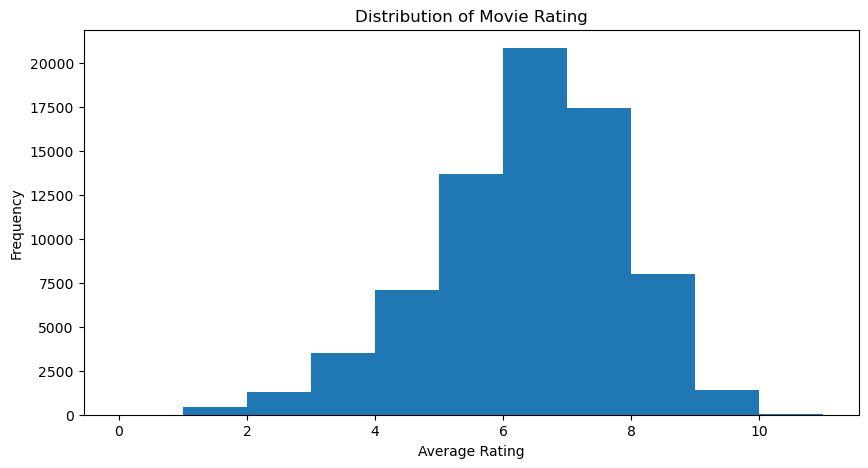

In [48]:
fig, ax = plt.subplots(figsize = (10, 5))

ax.hist( x = averagerating, bins = range(12))

ax.set_ylabel('Frequency')
ax.set_xlabel('Average Rating')
ax.set_title('Distribution of Movie Rating');

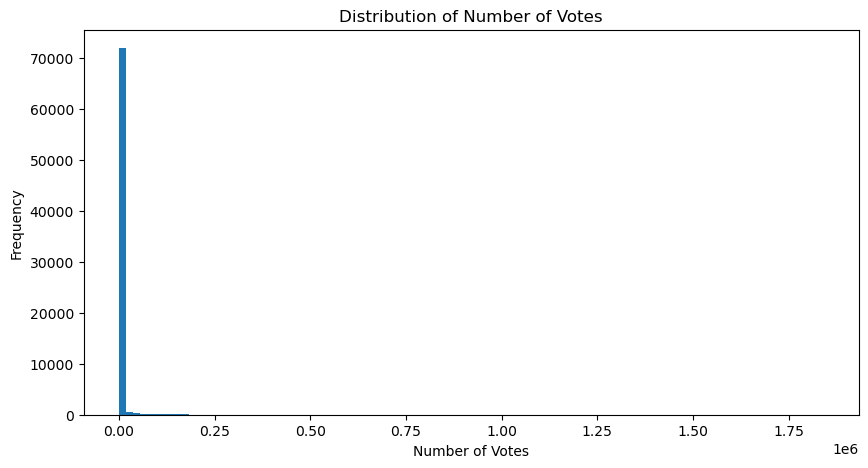

In [49]:
fig, ax = plt.subplots(figsize = (10, 5))

ax.hist( x = numvotes, bins = 100)

ax.set_ylabel('Frequency')
ax.set_xlabel('Number of Votes')
ax.set_title('Distribution of Number of Votes');

In [50]:
numvotes.value_counts()

numvotes
6           2875
5           2699
7           2476
8           2167
9           1929
            ... 
6552           1
6551           1
6548           1
6543           1
1841066        1
Name: count, Length: 7349, dtype: int64

In [51]:
numvotes.describe()

,numvotes
count,7.385600e+04
mean,3.523662e+03
std,3.029402e+04
min,5.000000e+00
25%,1.400000e+01
50%,4.900000e+01
75%,2.820000e+02
max,1.841066e+06


In [52]:
numvotes.isna().sum()

numvotes    0
dtype: int64

## Average Rating per Genres
### What I want to see
*** Filter for a genre, number of movie > 100 and number of vote > 1000
1. Genres have different average ratings
- Left Join to movie_rating (left), movie_basics (right)
- GROUP BY genres
- Average of (averagerating)


Issue : in the generes, there 1085 types of generes. how can I deal with it?
- I don't know, but let's just try and what genres are in top

In [53]:
movie_basics = pd.read_sql(
    """
    SELECT *
    FROM movie_basics
    ;
    """
, conn
)

In [54]:
movie_basics.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [55]:
movie_basics['genres'].value_counts().head(50)

genres
Documentary                      32185
Drama                            21486
Comedy                            9177
Horror                            4372
Comedy,Drama                      3519
Thriller                          3046
Action                            2219
Biography,Documentary             2115
Drama,Romance                     2079
Comedy,Drama,Romance              1558
Documentary,Drama                 1554
Comedy,Romance                    1507
Romance                           1454
Documentary,Music                 1365
Drama,Thriller                    1335
Documentary,History               1289
Horror,Thriller                   1253
Biography,Documentary,History     1230
Biography,Documentary,Drama       1028
Family                             939
Animation                          828
Drama,Family                       784
Action,Crime,Drama                 727
Comedy,Horror                      724
Crime,Drama                        723
Crime             

In [56]:
genres_averagerating = pd.read_sql(
    """
    WITH mr_mb AS (
    SELECT 
        mb.genres,
        AVG(mr.averagerating) AS Average_rating,
        SUM(mr.numvotes) AS Number_Votes,
        COUNT(*) AS Number_Movies
    FROM movie_ratings AS mr
    LEFT JOIN movie_basics AS mb
    USING(movie_id)
    GROUP BY genres
    ORDER BY 
        Average_rating DESC
        )

    SELECT *,
        DENSE_RANK() OVER(ORDER BY Average_rating DESC) AS RANK_N
    FROM mr_mb
    WHERE 
        Number_Movies > 100
        AND Number_Votes > 1000
        
    ;
    """
, conn
)

In [57]:
genres_averagerating['Average_rating'].describe()

count    96.000000
mean      6.307763
std       0.754506
min       4.429091
25%       5.783505
50%       6.270725
75%       6.754280
max       7.615341
Name: Average_rating, dtype: float64

In [58]:
genres_averagerating.head(50)

,genres,Average_rating,Number_Votes,Number_Movies,RANK_N
0,Music,7.615341,23980,176,1
1,"Adventure,Documentary",7.567692,22553,130,2
2,"Biography,Documentary,Music",7.566250,213438,240,3
3,"Biography,Documentary,Family",7.536364,17179,132,4
4,"Documentary,Sport",7.500000,114731,318,5
5,"Biography,Documentary,Drama",7.498674,74907,377,6
6,"Adventure,Biography,Documentary",7.492982,29929,114,7
7,"Documentary,Music",7.478756,393048,579,8
8,"Comedy,Documentary,Drama",7.477966,18850,118,9
9,"Biography,Documentary,History",7.454071,128555,479,10


## Average rating per Persons : #1 Directors
*** Filter Number_Movies > 10 AND Number_Votes > 1000
- Left join to movie_ratings (left) and directors (right)

In [59]:
directors_averagerating = pd.read_sql(
    """
    WITH mr_d_p AS (
    SELECT 
        p.primary_name AS Name,
        p.primary_profession AS Profession,
        AVG(mr.averagerating) AS Average_rating,
        SUM(mr.numvotes) AS Number_Votes,
        p.death_year,
        COUNT(*) AS Number_Movies
    FROM movie_ratings AS mr
    LEFT JOIN directors AS d
    USING(movie_id)
    LEFT JOIN persons AS p
    USING(person_id)
    GROUP BY person_id
    ORDER BY 
        Average_rating DESC,
        Number_Movies DESC
        
        )

    SELECT *
    FROM mr_d_p
    WHERE 
        Number_Movies > 10
        AND Number_Votes > 1000
    ;
    """
, conn
)

In [60]:
directors_averagerating.head(50)

,Name,Profession,Average_rating,Number_Votes,death_year,Number_Movies
0,Elizabeth Blake-Thomas,"producer,director,writer",8.671429,3947,NaN,14
1,Steve Ravic,"producer,director,writer",8.654545,7580,NaN,11
2,Anthony Russo,"producer,director,writer",8.246667,18421593,NaN,30
3,Joe Russo,"producer,director,writer",8.246667,18421593,NaN,30
4,Nick Rosen,"writer,producer,director",8.236364,9101,NaN,11
5,Josh Lowell,"director,producer,editor",8.221429,16142,NaN,14
6,Peter Mortimer,"director,writer,producer",8.221429,16142,NaN,14
7,Jaco Van Dormael,"director,writer,actor",8.106250,52003,NaN,16
8,Nick Morris,"director,editor,producer",8.100000,40845,NaN,12
9,S.S. Rajamouli,"writer,producer,director",7.986364,1140037,NaN,22


In [61]:
directors_averagerating['death_year'].unique()

array([  nan, 2014., 2016., 2015., 2018., 2017.])

In [62]:
directors_averagerating['Number_Movies'].value_counts()

Number_Movies
11     234
12     201
13     165
14     151
15     109
      ... 
60       1
114      1
96       1
119      1
73       1
Name: count, Length: 85, dtype: int64

In [63]:
directors_averagerating['Number_Movies'].describe()

count    1924.000000
mean       24.425156
std        24.739099
min        11.000000
25%        13.000000
50%        17.000000
75%        28.000000
max       752.000000
Name: Number_Movies, dtype: float64

In [64]:
directors_averagerating['Average_rating'].describe()

count    1924.000000
mean        5.827549
std         1.011769
min         1.054545
25%         5.200000
50%         5.895355
75%         6.596591
max         8.671429
Name: Average_rating, dtype: float64

In [65]:
directors_averagerating['Number_Votes'].describe()

count    1.924000e+03
mean     2.317634e+05
std      1.081228e+06
min      1.002000e+03
25%      3.388500e+03
50%      8.798500e+03
75%      3.289775e+04
max      1.864046e+07
Name: Number_Votes, dtype: float64

## tn_movie_budgets, Check this table

In [71]:
tn_movie_budgets['release_date'].value_counts()

release_date
Dec 31, 2014    24
Dec 31, 2015    23
Dec 31, 2010    15
Dec 31, 2008    14
Dec 31, 2009    13
                ..
Oct 21, 1977     1
Jun 23, 2009     1
Sep 26, 2017     1
Nov 14, 2007     1
Jul 13, 2005     1
Name: count, Length: 2418, dtype: int64

In [72]:
tn_movie_budgets['release_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5782 entries, 0 to 5781
Series name: release_date
Non-Null Count  Dtype 
--------------  ----- 
5782 non-null   object
dtypes: object(1)
memory usage: 45.3+ KB


In [72]:
tn_movie_budgets['release_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5782 entries, 0 to 5781
Series name: release_date
Non-Null Count  Dtype 
--------------  ----- 
5782 non-null   object
dtypes: object(1)
memory usage: 45.3+ KB


In [76]:
tn_movie_budgets['year']= tn_movie_budgets['release_date'].map(lambda x : x[-4:])

In [77]:
tn_movie_budgets['year'].value_counts()

year
2015    338
2010    274
2008    264
2006    260
2014    255
       ... 
1937      1
1927      1
1947      1
1958      1
1920      1
Name: count, Length: 96, dtype: int64

/var/folders/sf/jkklx58940qbt_9v7c47hrgw0000gp/T/ipykernel_1290/1570572361.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x1, rotation = 90)


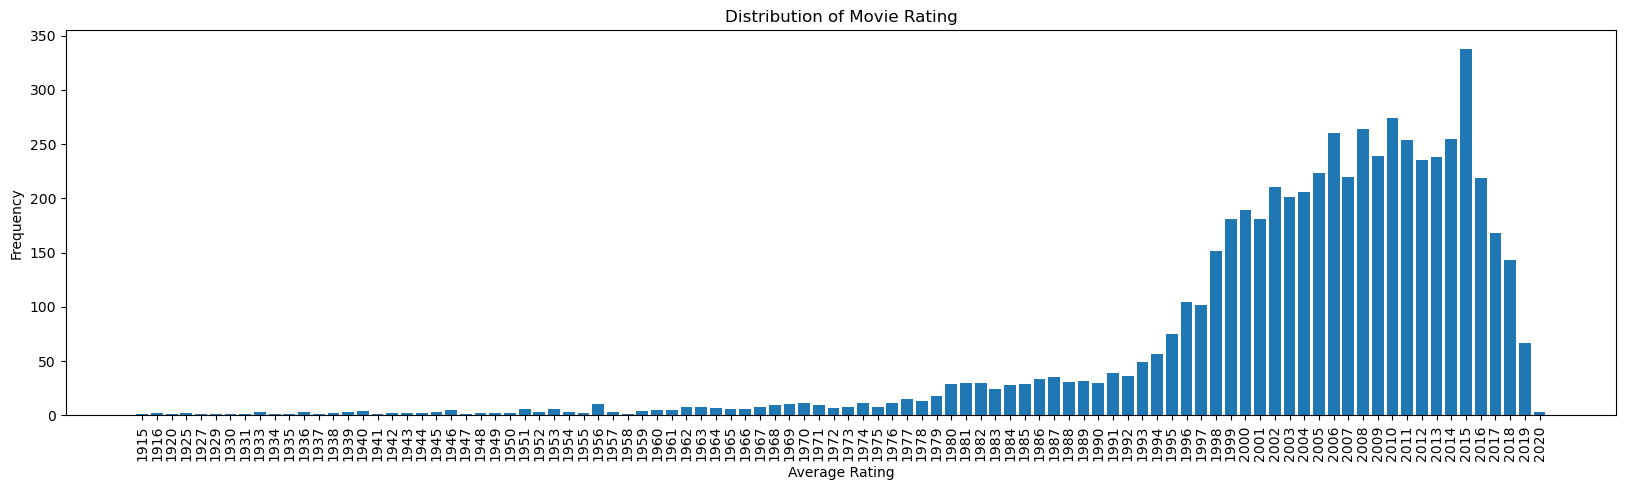

In [86]:
# Distribution of movies by year in the table of tn_movie_budgets
fig, ax = plt.subplots(figsize = (20, 5))

x1 = tn_movie_budgets['year'].value_counts().sort_index().index
y1 = tn_movie_budgets['year'].value_counts().sort_index().values

ax.bar( x1, y1)

ax.set_xticklabels(x1, rotation = 90)

ax.set_ylabel('Frequency')
ax.set_xlabel('Average Rating')
ax.set_title('Distribution of Movie Rating');

In [95]:
# Assuming tn_movie_budgets is your original DataFrame

# Convert the 'year' column to numeric (assuming it's currently of object data type)
tn_movie_budgets['year'] = pd.to_numeric(tn_movie_budgets['year'], errors='coerce')

# Create a new DataFrame containing data for the years 2010 to 2018
movie_budgets_2010_2018 = tn_movie_budgets[(tn_movie_budgets['year'] >= 2010) & (tn_movie_budgets['year'] <= 2018)]

# Now new_df contains only the rows with years between 2010 and 2018


In [96]:
movie_budgets_2010_2018['year'].value_counts()

year
2015    338
2010    274
2014    255
2011    254
2013    238
2012    235
2016    219
2017    168
2018    143
Name: count, dtype: int64

In [97]:
movie_budgets_2010_2018['movie'].value_counts()

movie
The Square              2
Robin Hood              2
Trance                  2
Snitch                  2
Cyrus                   1
                       ..
Darkest Hour            1
Midnight in Paris       1
Hope Springs            1
The Nut Job             1
A Plague So Pleasant    1
Name: count, Length: 2120, dtype: int64

In [98]:
movie_budgets_2010_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2124 entries, 1 to 5780
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 2124 non-null   int64 
 1   release_date       2124 non-null   object
 2   movie              2124 non-null   object
 3   production_budget  2124 non-null   object
 4   domestic_gross     2124 non-null   object
 5   worldwide_gross    2124 non-null   object
 6   year               2124 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 132.8+ KB


In [109]:
movie_budgets_2010_2018.loc[movie_budgets_2010_2018['movie'] == 'The Square', ['id', 'movie', 'release_date']]

,id,movie,release_date
5009,10,The Square,"Apr 9, 2010"
5099,100,The Square,"Oct 25, 2013"


In [106]:
movie_budgets_2010_2018.loc[movie_budgets_2010_2018['movie'] == 'Robin Hood', ['movie', 'release_date']]

,movie,release_date
38,Robin Hood,"May 14, 2010"
408,Robin Hood,"Nov 21, 2018"


In [107]:
movie_budgets_2010_2018.loc[movie_budgets_2010_2018['movie'] == 'Trance', ['movie', 'release_date']]

,movie,release_date
2970,Trance,"Apr 5, 2013"
5330,Trance,"Dec 31, 2012"


In [108]:
movie_budgets_2010_2018.loc[movie_budgets_2010_2018['movie'] == 'Snitch', ['movie', 'release_date']]

,movie,release_date
3025,Snitch,"Feb 22, 2013"
5351,Snitch,"Dec 31, 2012"


## Correlation of Movie Rating and Revenue